In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pickle



In [ ]:
df=pd.read_csv('/content/rul_hrs.csv')

In [ ]:
df.head()

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_42  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...  31.770832   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...  31.770832   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...  31.770830   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...  31.510420   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...  31.510420   

   sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2   41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3   40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4   41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   

   sensor_49  sensor_51         rul  
0   67.70834   201.3889  285.916667  
1   67.70834   201.3889  285.900000  
2   67.12963   203.7037  285.883333  
3   66.84028   203.1250  285.866667  
4   66.55093   201.3889  285.850000  

[5 rows x 53 columns]

In [ ]:
df.shape

(166441, 53)

In [ ]:
df.drop(['Unnamed: 0', 'timestamp'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51', 'rul'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166441 entries, 0 to 166440
Data columns (total 51 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sensor_00  166441 non-null  float64
 1   sensor_01  166441 non-null  float64
 2   sensor_02  166441 non-null  float64
 3   sensor_03  166441 non-null  float64
 4   sensor_04  166441 non-null  float64
 5   sensor_05  166441 non-null  float64
 6   sensor_06  166441 non-null  float64
 7   sensor_07  166441 non-null  float64
 8   sensor_08  166441 non-null  float64
 9   sensor_09  166441 non-null  float64
 10  sensor_10  166441 non-null  float64
 11  sensor_11  166441 non-null  float64
 12  sensor_12  166441 non-null  float64
 13  sensor_13  166441 non-null  float64
 14  sensor_14  166441 non-null  float64
 15  sensor_16  166441 non-null  float64
 16  sensor_17  166441 non-null  float64
 17  sensor_18  166441 non-null  float64
 18  sensor_19  166441 non-null  float64
 19  sensor_20  166441 non-n

# Missing Values

In [ ]:
df.isnull().sum()

sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_51    0
rul          0
dtype: int64

# Handling Outliers

In [ ]:
import pandas as pd

# Assuming your dataset is a DataFrame named 'df'
# Replace 'df' with your actual DataFrame variable

float_columns = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
                 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
                 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
                 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
                 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
                 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
                 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
                 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
                 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
                 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']

# Calculate Z-scores for each data point in the specified columns
z_scores = stats.zscore(df[float_columns])

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Create a mask for outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers from the original DataFrame
df1 = df[~outliers_mask.any(axis=1)].reset_index(drop=True)

# Display the new DataFrame without outliers
df1

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0                0  2018-04-01 00:00:00   2.465394  47.092010  53.211800   
1                1  2018-04-01 00:01:00   2.465394  47.092010  53.211800   
2                2  2018-04-01 00:02:00   2.444734  47.352430  53.211800   
3                3  2018-04-01 00:03:00   2.460474  47.092010  53.168400   
4                4  2018-04-01 00:04:00   2.445718  47.135410  53.211800   
...            ...                  ...        ...        ...        ...   
136086      166431  2018-07-25 13:51:00   2.384722  45.833332  53.038190   
136087      166432  2018-07-25 13:52:00   2.391609  45.833332  53.038193   
136088      166433  2018-07-25 13:53:00   2.384722  45.833330  53.038193   
136089      166435  2018-07-25 13:55:00   2.321759  45.789930  52.994790   
136090      166440  2018-07-25 14:00:00   2.318808  45.833332  52.994790   

        sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  ...  \
0       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
1       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
2       46.397570  638.888900   73.54598   13.32465   16.03733  ...   
3       46.397568  628.125000   76.98898   13.31742   16.24711  ...   
4       46.397568  636.458300   76.58897   13.35359   16.21094  ...   
...           ...         ...        ...        ...        ...  ...   
136086  44.053818  580.324097   69.99788   14.32292   16.20370  ...   
136087  44.053820  586.458313   70.10752   14.36632   16.12413  ...   
136088  44.010410  575.347168   69.95495   14.33015   16.12413  ...   
136089  44.010410  435.379028   73.42412   14.39525   16.20370  ...   
136090  43.880210  420.503448   72.52040   14.18547   16.24711  ...   

        sensor_42  sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  \
0       31.770832   41.92708  39.641200   65.68287   50.92593  38.194440   
1       31.770832   41.92708  39.641200   65.68287   50.92593  38.194440   
2       31.770830   41.66666  39.351852   65.39352   51.21528  38.194443   
3       31.510420   40.88541  39.062500   64.81481   51.21528  38.194440   
4       31.510420   41.40625  38.773150   65.10416   51.79398  38.773150   
...           ...        ...        ...        ...        ...        ...   
136086  37.500000   50.00000  56.423610   57.58102   61.92130  46.875000   
136087  36.979160   50.52083  54.976850   55.55556   62.50000  46.296300   
136088  36.718750   50.00000  53.530090   54.68750   62.21065  46.006940   
136089  36.718750   49.47916  52.083330   52.37268   60.76389  45.428240   
136090  36.458330   51.30208  52.102000   52.66204   67.12963  43.981480   

        sensor_48  sensor_49  sensor_51         rul  
0        157.9861   67.70834   201.3889  285.916667  
1        157.9861   67.70834   201.3889  285.900000  
2        155.9606   67.12963   203.7037  285.883333  
3        155.9606   66.84028   203.1250  285.866667  
4        158.2755   66.55093   201.3889  285.850000  
...           ...        ...        ...         ...  
136086   235.5324   63.36805   177.0833    0.150000  
136087   238.7153   62.50000   179.6875    0.133333  
136088   241.6088   61.92130   187.7894    0.116667  
136089   247.9745   65.68287   195.3125    0.083333  
136090   230.3241   69.73380   205.7292    0.000000  

[136091 rows x 53 columns]

# EDA

In [ ]:
df1.describe()

sensor_00      sensor_01      sensor_02      sensor_03  \
count  136091.000000  136091.000000  136091.000000  136091.000000   
mean        2.442707      47.756951      51.728468      43.899789   
std         0.109775       2.130265       1.872077       1.649274   
min         1.009375      37.065970      39.800346      35.677080   
25%         2.444734      46.267360      50.607640      42.751736   
50%         2.456539      47.829860      51.866320      44.010410   
75%         2.499826      49.131940      53.038190      45.095486   
max         2.549016      55.164930      56.032990      48.220490   

           sensor_04      sensor_05      sensor_06      sensor_07  \
count  136091.000000  136091.000000  136091.000000  136091.000000   
mean      629.141001      77.911184      13.608850      16.068145   
std        28.595016       7.508653       0.490648       0.385275   
min       118.981500      16.327520       6.467014      12.051500   
25%       627.662000      73.172035      13.317420      15.820310   
50%       632.754600      77.703870      13.563370      16.131360   
75%       637.500000      82.135110      13.925060      16.210940   
max       800.000000      99.999880      15.234380      19.133390   

           sensor_08      sensor_09  ...      sensor_42      sensor_43  \
count  136091.000000  136091.000000  ...  136091.000000  136091.000000   
mean       15.378697      15.064032  ...      35.613448      43.223796   
std         0.401730       0.309214  ...       3.136642       4.934258   
min         9.960938      10.033280  ...      26.562500      29.687498   
25%        15.147570      15.010130  ...      33.593750      39.583330   
50%        15.335650      15.082470  ...      35.416664      42.708330   
75%        15.625000      15.118630  ...      37.760410      45.833330   
max        19.292530      18.988710  ...      69.531250      76.562500   

           sensor_44      sensor_45      sensor_46      sensor_47  \
count  136091.000000  136091.000000  136091.000000  136091.000000   
mean       40.286891      40.765278      44.749835      43.405248   
std         5.019191       5.790053       6.947300       5.568553   
min        29.224540      30.381940      30.671297      30.960650   
25%        36.747680      36.747684      40.219910      39.351852   
50%        39.351852      39.351852      43.402780      42.245370   
75%        42.534721      43.113430      47.453700      46.006940   
max        65.682870      72.048610      85.937500      70.023150   

           sensor_48      sensor_49      sensor_51            rul  
count  136091.000000  136091.000000  136091.000000  136091.000000  
mean      128.209846      53.056477     196.348256     295.261463  
std        55.871171       8.520109      29.382079     222.802936  
min        30.381940      30.671297      38.194440       0.000000  
25%        82.465280      47.743057     181.134300      97.083333  
50%       116.030100      51.215279     197.916700     248.716667  
75%       165.219900      56.134260     210.358800     462.683333  
max       313.657400      95.196760     383.391200     824.466667  

[8 rows x 51 columns]

<Axes: xlabel='sensor_00', ylabel='Density'>

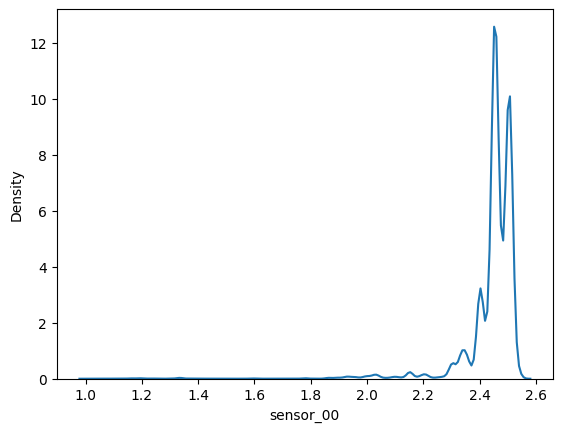

In [ ]:
sns.kdeplot(x='sensor_00',data=df1)

<Axes: xlabel='sensor_01', ylabel='Density'>

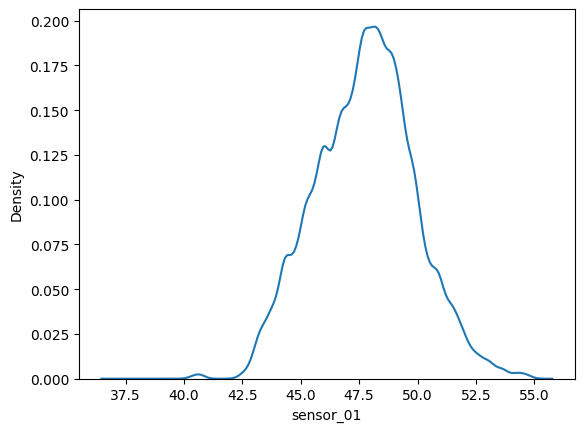

In [ ]:
sns.kdeplot(x='sensor_01',data=df1)

# **Bivariate Analysis**

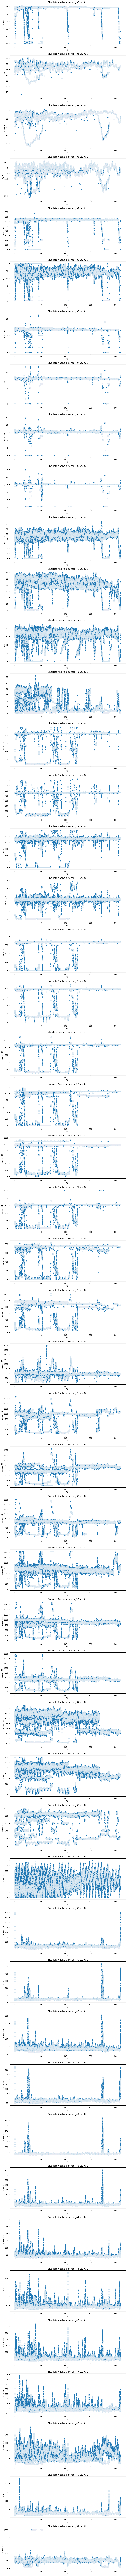

In [ ]:
# Specify the columns for bivariate analysis
columns_for_analysis = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
                         'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
                         'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
                         'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
                         'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
                         'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
                         'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
                         'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
                         'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
                         'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(columns_for_analysis), ncols=1, figsize=(10, 4 * len(columns_for_analysis)))

# Loop through the columns and create scatter plots
for i, column in enumerate(columns_for_analysis):
    sns.scatterplot(x='rul', y=column, data=df, ax=axes[i])
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('RUL')
    axes[i].set_title(f'Bivariate Analysis: {column} vs. RUL')

plt.tight_layout()
plt.show()

# Multivariate Analysis

<Axes: >

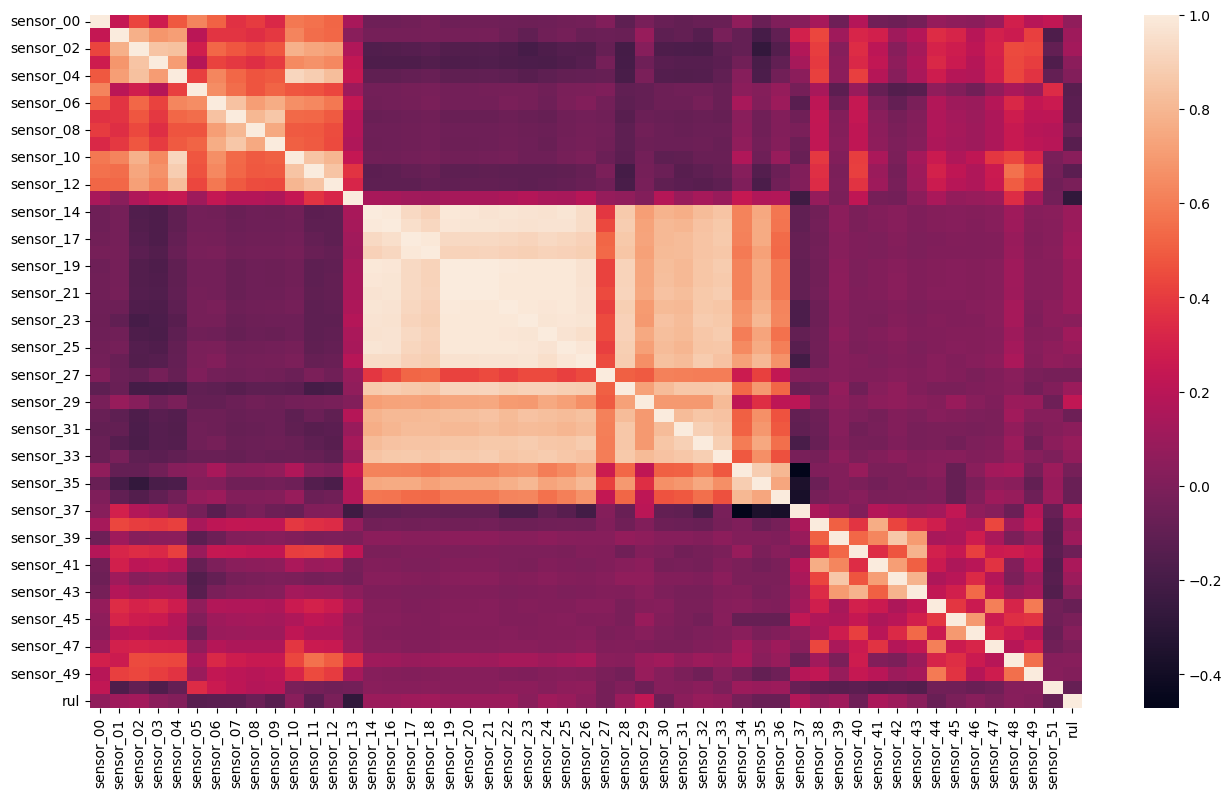

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr())

# Model Building

In [ ]:

x=df1.drop('rul',axis=1)
y=df1[['rul']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1)

# Linear Regression

In [ ]:
Linear_model=LinearRegression()

In [ ]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
r2_score(y_train,Linear_model.predict(X_train))

0.4994777730267699

In [ ]:
#Train MSE
mean_squared_error(y_train,Linear_model.predict(X_train))

24853.307956071145

In [ ]:
y_pred1=Linear_model.predict(X_test)

In [ ]:
E1=mean_absolute_error(y_test,y_pred1);E1

E2=mean_squared_error(y_test,y_pred1);E2

E3=mean_absolute_percentage_error(y_test,y_pred1);E3

3.746124621999278

In [ ]:
def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             })
    return Err

Error(E1,E2,E3)

Error         Value
0             mean_absolute_error    125.469585
1              mean_squared_error  24914.296787
2  mean_absolute_percentage_error      3.746125

# Decision Tree Regression

In [ ]:
DTR_model=DecisionTreeRegressor()


In [ ]:
DTR_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
pred2=DTR_model.predict(X_test)

In [ ]:
r2_score(y_train,DTR_model.predict(X_train))

0.9999911772649048

In [ ]:
#Train MSE
mean_squared_error(y_train,DTR_model.predict(X_train))

0.43809073907155577

In [ ]:
E1=mean_absolute_error(y_test,pred2);E1

E2=mean_squared_error(y_test,pred2);E2

E3=mean_absolute_percentage_error(y_test,pred2);E3


def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             })
    return Err

Error(E1,E2,E3)



Error       Value
0             mean_absolute_error    1.707712
1              mean_squared_error  628.107445
2  mean_absolute_percentage_error    0.596839

# Random Forest

In [ ]:
RF_model=RandomForestRegressor(n_estimators=10)

In [ ]:
RF_model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=10)

In [ ]:
pred3=RF_model.predict(X_test)

In [ ]:
r2_score(y_train,RF_model.predict(X_train))

0.9989275485347949

In [ ]:
#Train MSE
mean_squared_error(y_train,RF_model.predict(X_train))

61.27049532366474

In [ ]:
E1=mean_absolute_error(y_test,pred3);E1

E2=mean_squared_error(y_test,pred3);E2

E3=mean_absolute_percentage_error(y_test,pred3);E3


def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             })
    return Err

Error(E1,E2,E3)


Error       Value
0             mean_absolute_error    1.999072
1              mean_squared_error  237.795541
2  mean_absolute_percentage_error    0.216684

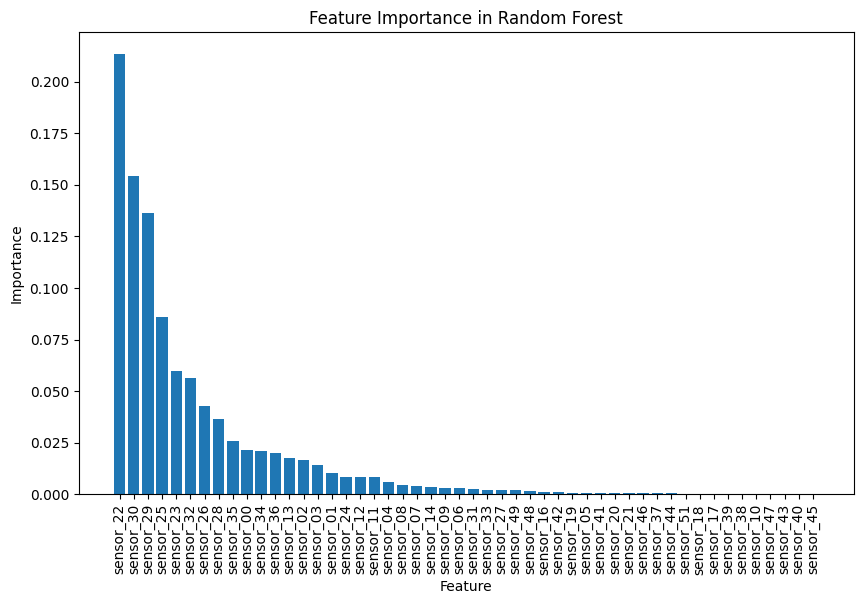

In [ ]:

# Get feature importances
feature_importances = RF_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # replace with your actual feature names if using a DataFrame

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]



# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

# SVM

In [ ]:

# Create an SVM regressor
svm_regressor = SVR(kernel='rbf')

# Train the SVM regressor
svm_regressor.fit(X_train, y_train.values.ravel())

SVR()

In [ ]:
r2_score(y_train,svm_regressor.predict(X_train))

0.2954963600985967

In [ ]:
#train MSE
mean_squared_error(y_train,svm_regressor.predict(X_train))

35062.31821518253

In [ ]:
pred4=svm_regressor.predict(X_test)

In [ ]:
E1=mean_absolute_error(y_test,pred4);E1

E2=mean_squared_error(y_test,pred4);E2

E3=mean_absolute_percentage_error(y_test,pred4);E3


def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             })
    return Err

Error(E1,E2,E3)

Error         Value
0             mean_absolute_error    147.455234
1              mean_squared_error  34674.822169
2  mean_absolute_percentage_error      4.267363

# Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Final_model

In [ ]:
#Best Features

In [ ]:
'''sensor_22: 0.21205539205591223
sensor_30: 0.15359844256249977
sensor_29: 0.13397167759888434
sensor_25: 0.09024853532464891
sensor_23: 0.06115000347610478
sensor_32: 0.056899870755319014
sensor_26: 0.03901144255605769
sensor_28: 0.0386999414532898
sensor_35: 0.026082099472388102
sensor_00: 0.024172849585071154
sensor_36: 0.02173374768700442
sensor_13: 0.017683113434630197'''

'sensor_22: 0.21205539205591223\nsensor_30: 0.15359844256249977\nsensor_29: 0.13397167759888434\nsensor_25: 0.09024853532464891\nsensor_23: 0.06115000347610478\nsensor_32: 0.056899870755319014\nsensor_26: 0.03901144255605769\nsensor_28: 0.0386999414532898\nsensor_35: 0.026082099472388102\nsensor_00: 0.024172849585071154\nsensor_36: 0.02173374768700442\nsensor_13: 0.017683113434630197'

In [ ]:
df2=df1[['sensor_22','sensor_30','sensor_29','sensor_25','sensor_23','sensor_32','sensor_26','sensor_28','sensor_35','sensor_00','sensor_36','sensor_13','rul']]

In [ ]:
df2

sensor_22  sensor_30  sensor_29  sensor_25  sensor_23  sensor_32  \
0        498.8926   594.4445   684.9443   741.7151   975.9409   680.4416   
1        498.8926   594.4445   684.9443   741.7151   975.9409   680.4416   
2        501.3617   661.5740   715.6266   740.8031   982.7342   694.7721   
3        499.0430   686.1111   690.4011   739.2722   977.7520   683.3831   
4        498.5383   631.4814   704.6937   737.6033   979.5755   702.4431   
...           ...        ...        ...        ...        ...        ...   
136086   531.8923   690.2778   537.8336   735.5462  1086.9900   990.4119   
136087   531.8923   690.2778   537.8336   735.5462  1086.9900   990.4119   
136088   536.0236   707.8704   556.6888   738.4272  1091.1510   997.0121   
136089   535.2675   682.8704   560.5079   740.0809  1092.7320  1008.5510   
136090   531.8727   703.7037   551.2756   740.6738  1093.5790  1013.3760   

        sensor_26  sensor_28  sensor_35  sensor_00  sensor_36  sensor_13  \
0        848.0708   785.1935   341.9039   2.465394   195.0655   1.681353   
1        848.0708   785.1935   341.9039   2.465394   195.0655   1.681353   
2        849.8997   778.5734   343.1955   2.444734   200.9694   1.708474   
3        847.7579   779.5091   343.9586   2.460474   193.1689   1.579427   
4        846.9182   785.2307   339.9630   2.445718   193.8770   1.683831   
...           ...        ...        ...        ...        ...        ...   
136086   980.7735  1006.4350   514.8546   2.384722   829.3635  12.284980   
136087   980.7735  1006.4350   514.8546   2.391609   829.3635  12.155790   
136088   981.8679  1000.5410   502.7365   2.384722   830.5729  12.229430   
136089   980.3060   994.2258   488.0212   2.321759   804.0511  12.155570   
136090   981.4561  1023.1660   522.5594   2.318808   812.8298  12.217860   

               rul  
0       285.916667  
1       285.900000  
2       285.883333  
3       285.866667  
4       285.850000  
...            ...  
136086    0.150000  
136087    0.133333  
136088    0.116667  
136089    0.083333  
136090    0.000000  

[136091 rows x 13 columns]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X=df2.drop(['rul'],axis=1)
y = df2['rul']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor model
final_model = RandomForestRegressor(n_estimators=10)
final_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
pred5=final_model.predict(X_test)

In [ ]:
#Train MSE
mean_squared_error(y_train,final_model.predict(X_train))

120.72360283681384

In [ ]:
r2_score(y_train,final_model.predict(X_train))

0.9975743127679527

In [ ]:
E1=mean_absolute_error(y_test,pred5);E1

E2=mean_squared_error(y_test,pred5);E2

E3=mean_absolute_percentage_error(y_test,pred5);E3


def Error(E1,E2,E3):
    Err=pd.DataFrame({'Error':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'],
              'Value':[E1,E2,E3]
             })
    return Err

Error(E1,E2,E3)

Error       Value
0             mean_absolute_error    6.970070
1              mean_squared_error  616.186049
2  mean_absolute_percentage_error    0.275668

In [ ]:
# Save the model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
loaded_model = pickle.load(open('final_model.pkl', 'rb'))

In [ ]:
#convert month to year and months
n=131
year=131//12
year

10